# Alucar - Analisando as vendas

In [96]:
import pandas as pd 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

In [97]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [98]:
alucar = pd.read_csv('data/alucar.csv')

In [99]:
print(f'Quantidade de linhas e colunas : {alucar.shape} ')

Quantidade de linhas e colunas : (24, 2) 


In [100]:
print(f'Quantidade de dados nulos : {alucar.isna().sum().sum()}')

Quantidade de dados nulos : 0


In [101]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [102]:
alucar.mes = pd.to_datetime(alucar.mes) # Convertendo de object para dataTime

In [103]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

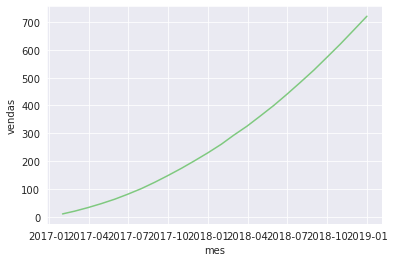

In [104]:
sns.lineplot(x='mes',y='vendas', data=alucar)

In [105]:
# Configurando o grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')

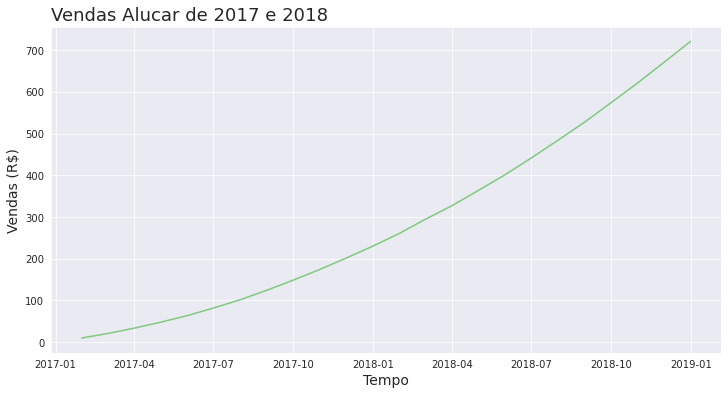

In [106]:
ax = sns.lineplot(x='mes',y='vendas', data=alucar)
# Aumentando a figura
ax.figure.set_size_inches(12,6)
# colocando um titulo
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

In [107]:
alucar['aumento'] = alucar.vendas.diff() # diff() subtrai um um por um exemplo mes 2 - mes 1 mes 3 -mes2
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


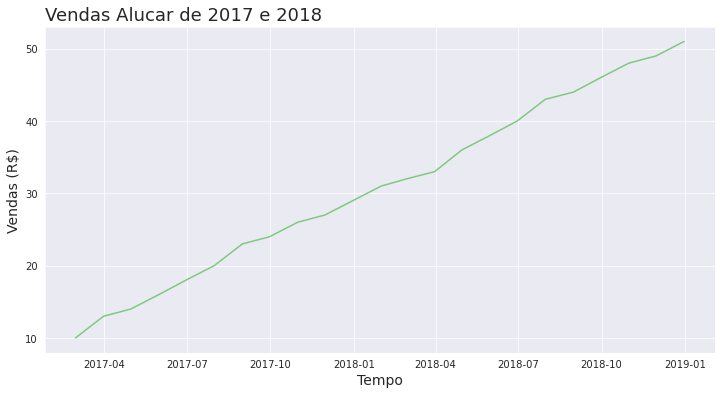

In [108]:
ax = sns.lineplot(x='mes',y='aumento', data=alucar)
# Aumentando a figura
ax.figure.set_size_inches(12,6)
# colocando um titulo
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

In [109]:
# Função para o grafico lineplot com as configurações padrao
def plotar(x,y,dataset,titulo,labelx,labely):
    '''
    x = string do x 
    y = string do y
    dataset = dataFrame
    titulo = string 
    labelx = string
    labely = string
    '''
    # Configurando o grafico
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    # Aumentando a figura
    ax.figure.set_size_inches(12,6)
    # colocando um titulo
    ax.set_title(titulo, loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
    ax.set_xlabel(labelx,fontsize = 14)
    ax.set_ylabel(labely,fontsize = 14)
 

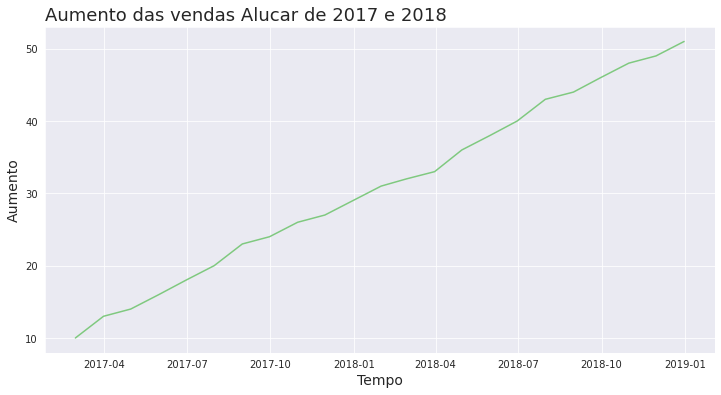

In [110]:


a = plotar('mes','aumento',alucar,'Aumento das vendas Alucar de 2017 e 2018','Tempo','Aumento')

In [111]:
help(plotar)

Help on function plotar in module __main__:

plotar(x, y, dataset, titulo, labelx, labely)
    x = string do x 
    y = string do y
    dataset = dataFrame
    titulo = string 
    labelx = string
    labely = string



In [112]:
alucar['aceleracao'] = alucar.aumento.diff()

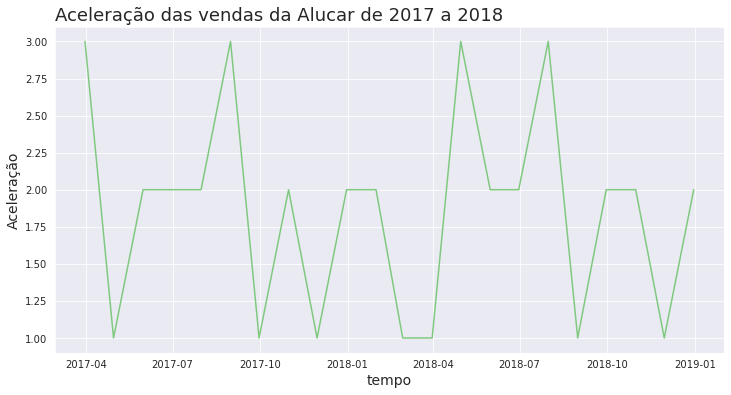

In [113]:
plotar(x='mes',y='aceleracao',dataset=alucar,titulo='Aceleração das vendas da Alucar de 2017 a 2018',labelx='tempo',labely='Aceleração')

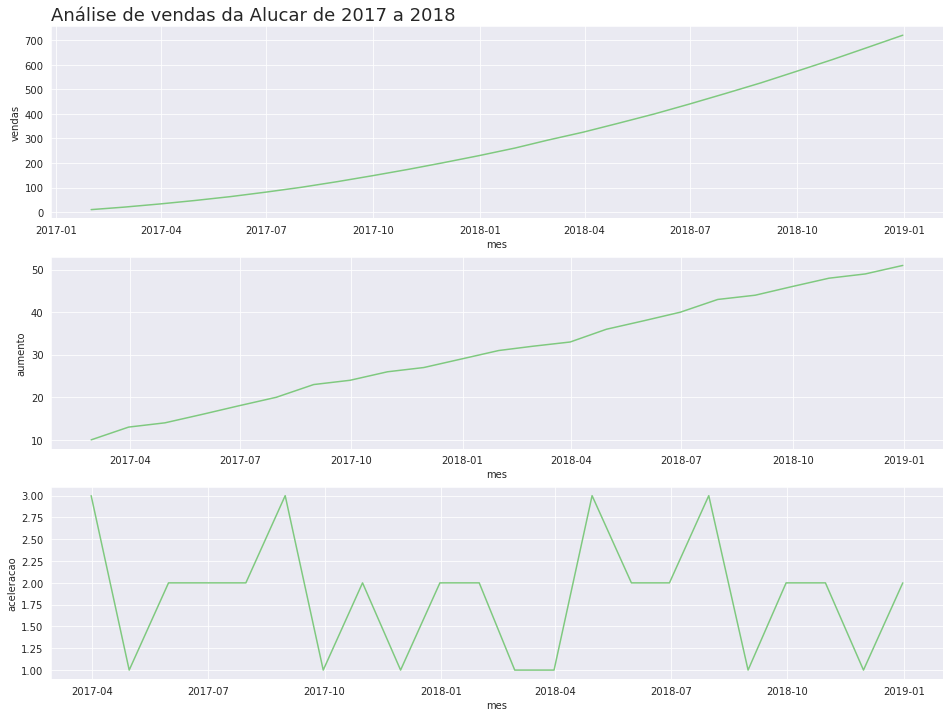

In [135]:
#juntar os graficos
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) # (linhas, colunas, posicao nas linhas)
ax.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes',y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao', data=alucar)
ax = ax 

In [136]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo=''):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1) # (linhas, colunas, posicao nas linhas)
    ax.set_title(titulo, fontsize = 18, loc='left')
    sns.lineplot(x=x,y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3, data=dataset)
    ax = ax 

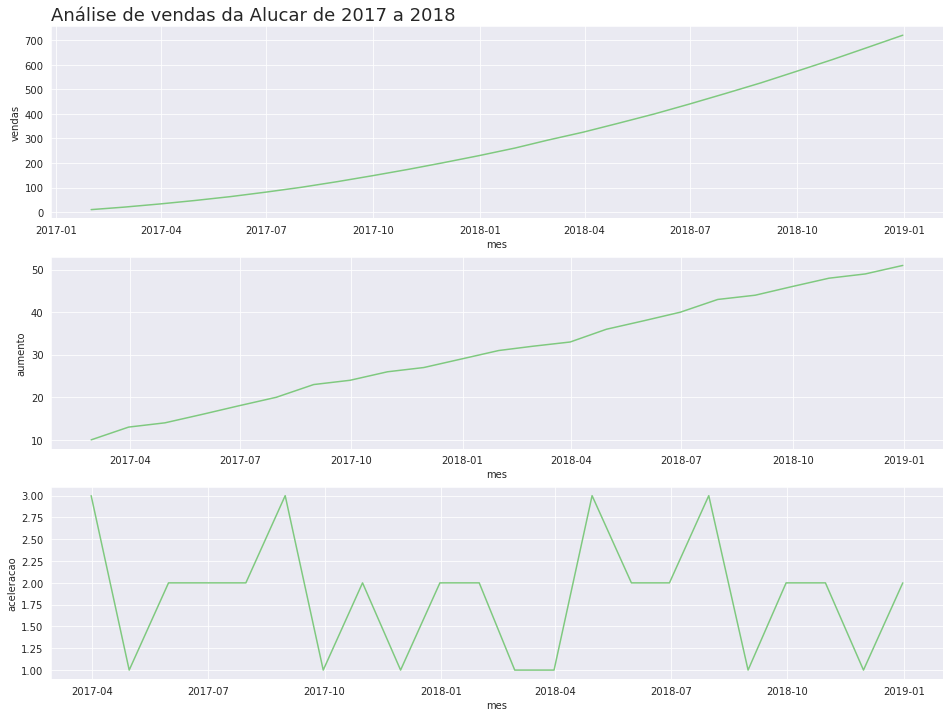

In [139]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise de vendas da Alucar de 2017 a 2018')

# Correlação

In [140]:
from pandas.plotting import autocorrelation_plot

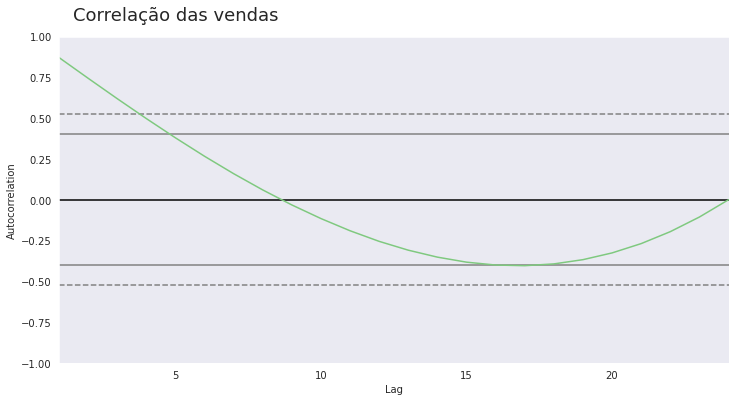

In [148]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar.vendas)


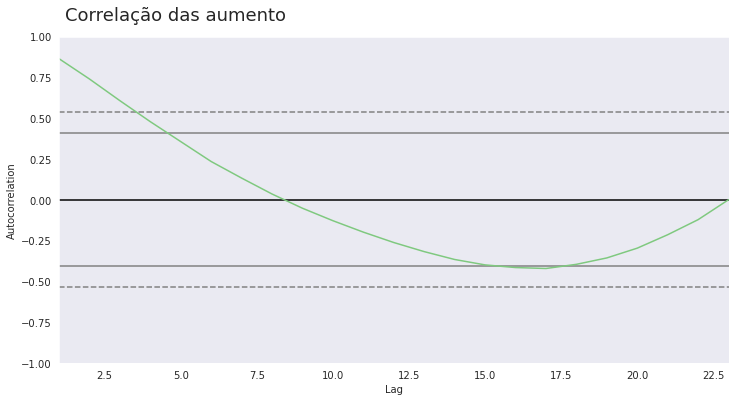

In [154]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:]) # ja que o indice 0 é nulo tem que passar pelo 1


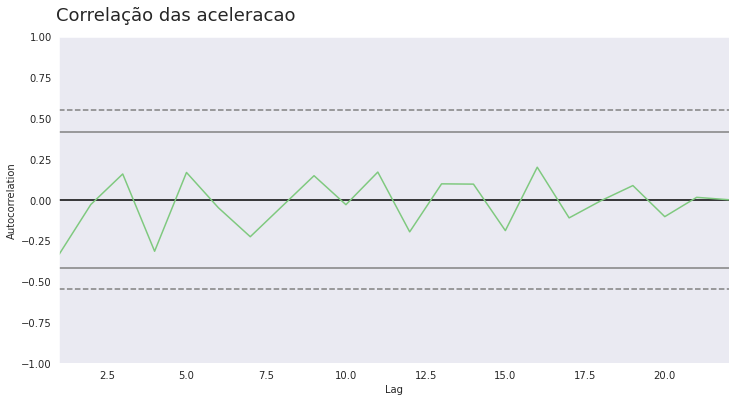

In [156]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleracao',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])